In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()
X, Y = data.data, data.target

In [3]:
print(data.feature_names)
print(data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
print(X_test.shape)


(114, 30)


In [7]:
class BinaryClassification(torch.nn.Module):
  def __init__(self, input_dimension):
    super().__init__()
    self.linear = torch.nn.Linear(input_dimension, 1)

  def forward(self, input_dimension):
      return self.linear(input_dimension)

In [8]:
_, input_dimension = X_train.shape

In [9]:
model = torch.nn.Linear(input_dimension, 1)

In [10]:
def configure_loss_function(): 
  return torch.nn.BCEWithLogitsLoss()

In [11]:
def configure_optimizer(model):
  return torch.optim.Adam(model.parameters())

In [12]:
def full_gd(model, criterion, optimizer, X_train, y_train, n_epochs=2000):
  train_losses = np.zeros(n_epochs)
  test_losses = np.zeros(n_epochs)

  for it in range(n_epochs): 
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    outputs_test = model(X_test)
    loss_test = criterion(outputs_test, y_test)

    train_losses[it] = loss.item()
    test_losses[it] = loss_test.item()

    if (it + 1) % 50 == 0:
      print(f'In this epoch {it+1}/{n_epochs}, Training loss: {loss.item():.4f}, Test loss: {loss_test.item():.4f}')

  return train_losses, test_losses

In [13]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32)).reshape(-1, 1)
y_test = torch.from_numpy(y_test.astype(np.float32)).reshape(-1, 1)

In [14]:
criterion = configure_loss_function()
optimizer = configure_optimizer(model)
train_losses, test_losses = full_gd(model, criterion, optimizer, X_train, y_train)

In this epoch 50/2000, Training loss: 0.4403, Test loss: 0.4317
In this epoch 100/2000, Training loss: 0.3284, Test loss: 0.3220
In this epoch 150/2000, Training loss: 0.2675, Test loss: 0.2608
In this epoch 200/2000, Training loss: 0.2290, Test loss: 0.2218
In this epoch 250/2000, Training loss: 0.2021, Test loss: 0.1951
In this epoch 300/2000, Training loss: 0.1822, Test loss: 0.1758
In this epoch 350/2000, Training loss: 0.1669, Test loss: 0.1615
In this epoch 400/2000, Training loss: 0.1546, Test loss: 0.1506
In this epoch 450/2000, Training loss: 0.1447, Test loss: 0.1421
In this epoch 500/2000, Training loss: 0.1364, Test loss: 0.1353
In this epoch 550/2000, Training loss: 0.1294, Test loss: 0.1298
In this epoch 600/2000, Training loss: 0.1234, Test loss: 0.1253
In this epoch 650/2000, Training loss: 0.1182, Test loss: 0.1216
In this epoch 700/2000, Training loss: 0.1136, Test loss: 0.1186
In this epoch 750/2000, Training loss: 0.1095, Test loss: 0.1160
In this epoch 800/2000, Tr

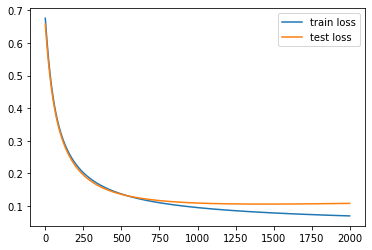

In [15]:
plt.plot(train_losses, label = 'train loss')
plt.plot(test_losses, label = 'test loss')
plt.legend()
plt.show()

In [16]:
with torch.no_grad():
  p_train = model(X_train)
  p_train = (p_train.numpy() > 0)

  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model(X_test)
  p_test = (p_test.numpy() > 0)
  
  test_acc = np.mean(y_test.numpy() == p_test)

In [17]:
print(train_acc)
print(test_acc)

0.9846153846153847
0.956140350877193
